**IMPORT LIBRARY**

In [36]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import cv2
import numpy as np

**MENGAMBIL DAN MENAMPILKAN DATA**

In [37]:
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
#mengambil data fashion
(x_train, y_train),(x_test,y_test) = fashion_mnist.load_data()

In [38]:
#menampilkan jumlah contoh
train_shape = x_train.shape
test_shape = x_test.shape

print(f"{train_shape[0]} Contoh, Ukuran: ({train_shape[1]}, {train_shape[2]}) (training image)")
print(f"{test_shape[0]} Contoh, ukuran: ({test_shape[1]}, {test_shape[2]}) (test image)")

60000 Contoh, Ukuran: (28, 28) (training image)
10000 Contoh, ukuran: (28, 28) (test image)


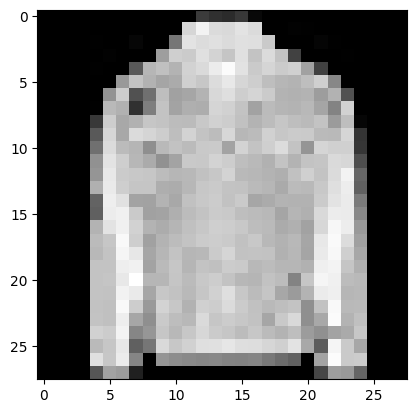

In [40]:
plt.imshow(x_train[1230], cmap = 'gray')

In [42]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [43]:
x_train[1230]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.18431373,
        0.47843137, 0.4745098 , 0.57647059, 0.52941176, 0.49803922,
        0.51764706, 0.56470588, 0.59215686, 0.54117647, 0.2745098 ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.59607843,
        0.60392157, 0.50980392, 0.62745098, 0.67058824, 0.73333333,
        0.61960784, 0.52156863, 0.37647059, 0.37647059, 0.39215686,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.44313725,
        0.50588235, 0.47843137, 0.49019608, 0.4745098 , 0.38823529,
        0.31372549, 0.3058

**MEMBUAT MODEL**

In [44]:
encode_input = keras.Input(shape=(28,28,1),name="image")#mengambil input
input = keras.layers.Flatten()(encode_input)
encoding = keras.layers.Dense(512, activation="relu")(input)
encoding = keras.layers.Dense(256, activation="relu")(encoding)
encoding = keras.layers.Dense(128, activation="relu")(encoding)
encoding = keras.layers.Dense(64, activation="relu")(encoding)#mengecilkan ukuran gambar

encode = keras.Model(encode_input, encoding, name="encoder")#membuat model encode

decoder_input = keras.layers.Dense(64, activation='relu')(encoding)
decoding = keras.layers.Dense(128, activation='relu')(decoder_input)
decoding = keras.layers.Dense(256, activation='relu')(decoding)
decoding = keras.layers.Dense(512, activation='relu')(decoding)
decoding = keras.layers.Dense(784, activation='relu')(decoding)#mengembalikan ukuran gambar 784

decode = keras.layers.Reshape((28,28,1))(decoding) #membuat model decode

autoencoder = keras.Model(encode_input, decode, name="autoencoder")#membuat model autoencoder

In [45]:
opt = keras.optimizers.Adam()
autoencoder.compile(optimizer=opt,
                    loss='mean_squared_error',
                    metrics=['mse']) #kompilasi model autoencoder

autoencoder.fit(x_train, x_train, #melatih model autoencoder
                epochs=10,#jumlah iterasi pelatihan
                batch_size=100,#mengatur ukuran batch selama pelatihan
                shuffle=True,#mengatur apakah data pelatihan akan diacak sebelum setiap epoch
                validation_data=(x_train, x_train))#validasi data

Epoch 1/10
600/600 [==============================] - 33s 52ms/step - loss: 0.0365 - mse: 0.0365 - val_loss: 0.0223 - val_mse: 0.0223
Epoch 2/10
600/600 [==============================] - 28s 47ms/step - loss: 0.0202 - mse: 0.0202 - val_loss: 0.0182 - val_mse: 0.0182
Epoch 3/10
600/600 [==============================] - 22s 36ms/step - loss: 0.0170 - mse: 0.0170 - val_loss: 0.0159 - val_mse: 0.0159
Epoch 4/10
600/600 [==============================] - 23s 38ms/step - loss: 0.0153 - mse: 0.0153 - val_loss: 0.0149 - val_mse: 0.0149
Epoch 5/10
600/600 [==============================] - 22s 37ms/step - loss: 0.0147 - mse: 0.0147 - val_loss: 0.0142 - val_mse: 0.0142
Epoch 6/10
600/600 [==============================] - 21s 36ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0134 - val_mse: 0.0134
Epoch 7/10
600/600 [==============================] - 21s 36ms/step - loss: 0.0133 - mse: 0.0133 - val_loss: 0.0129 - val_mse: 0.0129
Epoch 8/10
600/600 [==============================] - 23s 38ms

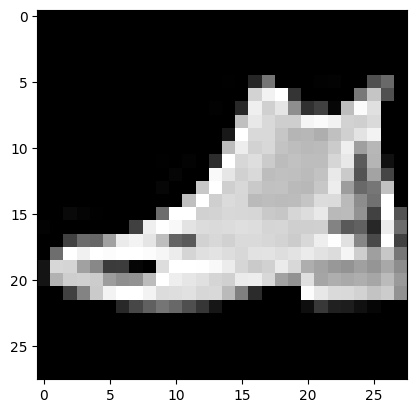

In [46]:
plt.imshow(x_test[1230],cmap='gray')

1/1 [==============================] - 0s 138ms/step


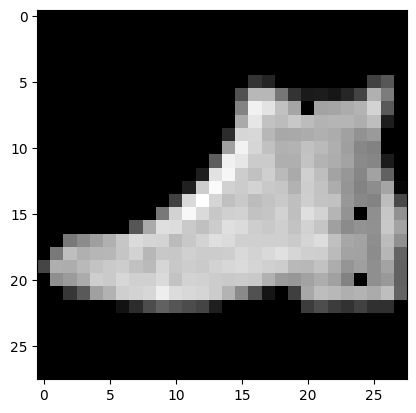

In [47]:
plt.imshow(autoencoder.predict([x_test[1230].reshape(-1,28,28,1)])[0], cmap='gray')

7977
1/1 [==============================] - 0s 24ms/step
5112
1/1 [==============================] - 0s 27ms/step
3337
1/1 [==============================] - 0s 24ms/step
8000
1/1 [==============================] - 0s 33ms/step
8974
1/1 [==============================] - 0s 22ms/step
1219
1/1 [==============================] - 0s 23ms/step
9202
1/1 [==============================] - 0s 22ms/step
6774
1/1 [==============================] - 0s 25ms/step
2872
1/1 [==============================] - 0s 22ms/step
6365
1/1 [==============================] - 0s 27ms/step


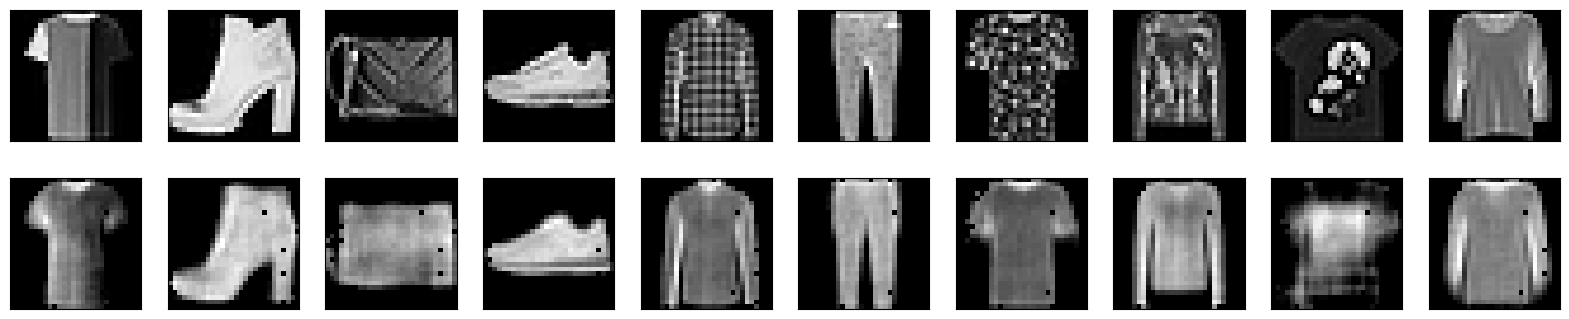

In [54]:
import random
test_shape = x_test.shape
lim = test_shape[0]
n=10
plt.figure(figsize=(20, 4))
for i in range(n):
  index = random.randint(0,lim-1)
  # menampilkan data original
  print(index)
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[index],cmap='gray')
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # menampilkan data yang telah direkonstruksi
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(autoencoder.predict([x_test[index].reshape(-1,28,28,1)])[0], cmap='gray')
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()